In [41]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import dataframe_image as dfi
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123
user_file = "C:\\Users\\zachi\\Desktop\\final_project_22\\data_nov_21.xlsx"
df=pd.read_excel(user_file)


In [42]:
#remove column - "removed 1"

df.drop(columns=['Removed 1'],inplace=True)

In [43]:
#make category easier to understand 

df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})


In [44]:
#convert "time stamp" to english

df = df.rename(columns={"חותמת זמן":"Time stamp"})

In [45]:
#fix summary column texts

df = df.replace(r'\n',' ', regex=True) 

post_description=df["A short summary of the content- write briefly in your own words "]


In [46]:
#change the date time to the d/m/y

from datetime import datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], errors='coerce') #This function convert the date text into dt.date type



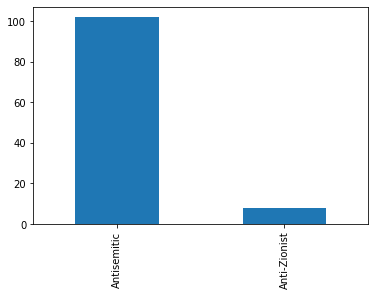

In [47]:
#Type of content in each social media platform

#Define each social platform

list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]

#User input
user_selection = "Twitter"

#Define social platform

dynamic_social_platform =  df["Platform" ]== user_selection

#Plot the categories data
df_selection = df[dynamic_social_platform]
post_count_by_category_plot = df_selection['Category'].value_counts().plot(kind='bar')#, title = "Posts category of" + user_selection)

plt.savefig("post_count_by_category_plot_specific.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

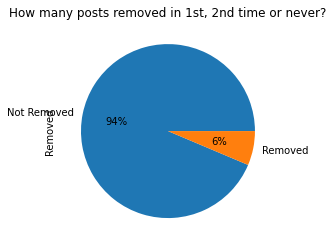

In [48]:
#Cheking the percentage of posts removing in general view

status = df_selection["Removed"]

general_removal_view = status.value_counts() #get general info about the removal process of platforms

removal_posts_statistics_plot = general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts removed in 1st, 2nd time or never?") 


plt.savefig("removal_posts_statistics_plot.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)



In [49]:
#תכנים שלא הוסרו למרות שקוטלגו כאנטישמיים לפי רשת

outpot_category_removal_stats= df_selection.groupby(['Removed', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['Removed', 'Not Removed'])
outpot_category_removal_stats = outpot_category_removal_stats.astype("int")
print ("Non-removed content - although recognized as antisemitic")

dfi.export(outpot_category_removal_stats,"outpot_category_removal_stats.png")


Non-removed content - although recognized as antisemitic


In [50]:

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF


pdf = FPDF()

pdf.add_page()

pdf.set_font('Arial', size = 16)

pdf.cell(40)

pdf.cell(75, 10,'Report for' + " "+ user_selection , 0, 2, 'C')

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)

pdf.image("post_count_by_category_plot_specific.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(20)


pdf.image("removal_posts_statistics_plot.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)

pdf.image("outpot_category_removal_stats.png")


pdf.output("Report for social media platforms individually.pdf")

''